# Аугментация итоговая

In [ ]:
#@title Загружаем билиотеки
import os
import shutil
import zipfile
import cv2
import albumentations as A
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import random

from google.colab import drive, files                                           # подключем диск, # Загрузка файлов                                                                  # импортируем модуль для удобной работы с файлами
import gdown
print(f"\x1b[34mБиблиотеки загружены.")

Библиотеки загружены.


In [ ]:
#@title Монтируем диск
try:
    drive.mount('/content/drive')
    print(f"\x1b[34mGoogle Drive успешно подключен.")
except Exception as e:
    print("Не удалось подключить Google Drive:", e)

Mounted at /content/drive
Google Drive успешно подключен.


In [ ]:
#@title Скачиваем файл данных для аугментации
path_file = 'https://drive.google.com/uc?id=1Qp1mE7n4JP0cgM80w7ikdLy9GBmv5jZp' # Karate mixed 11 classes 562 Images _ crop 224-224.zip
#path_file = 'https://drive.google.com/uc?id=1q0vb4YdEOU8GCSMpeW_qol3nMCPNmINm'
gdown.download(path_file, None, quiet = True)
!echo "Скачивание архива успешно завершено!"

Скачивание архива успешно завершено!


In [ ]:
#@title Копируем файл архива
# Укажите путь для архива
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Datas/Zips/Karate mixed 11 classes 562 Images _ crop 224-224.zip'
send_zip = '/content/Karate mixed 11 classes 562 Images _ crop 224-224.zip'
# Копирование
shutil.copy(zip_file_path, send_zip)

'/content/Karate mixed 11 classes 562 Images _ crop 224-224.zip'

In [ ]:
#@title Разархивируем архив данных
!unzip -q "Karate mixed 11 classes 562 Images _ crop 224-224.zip"
!echo "Распаковка архива успешно завершена!"

Распаковка архива успешно завершена!


In [ ]:
#@title Аугментация данных
# Укажите путь к папке с оригинальными изображениями
def created_augmented_images(path_files, n_img = 5, type_data = "Аугментируем данные для обучения сети"):
    # Укажите путь к папке, в которой будут сохранены аугментированные изображения
    path_base = os.path.normpath(path_files)
    augmented_data_dir = path_base + ' aug'

    # Создаем выходную папку для аугментированных изображений
    os.makedirs(augmented_data_dir, exist_ok = True)

    # Создание композиции аугментаций
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),  # Горизонтальное отражение
        A.Rotate(limit=(-1, 1), p=0.5),  # Вращение от -5 до 5 градусов
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=5, p=0.5),  # Сдвиг, масштабирование и вращение
        A.GaussianBlur(blur_limit=(3, 5), p=0.5),  # Размытие с нечетным значением blur_limit
        A.Sharpen(alpha=(0.5, 1.0), p=0.5),  # Резкость
        A.ToGray(p=0.5),  # Преобразование в черно-белое изображение
        A.ChannelShuffle(p=0.5),  # Изменение порядка цветовых каналов
        A.Resize(224, 224),  # Изменение размера до 224x224
        #A.InvertImg(p=0.2),  # Инвертирование цветов изображения
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),  # Изменение яркости и контраста
    ])

    # Получаем список классов (подпапок)
    classes = os.listdir(path_files)
    classes.sort()

    n_img = n_img # Количество аугментированных изображений

    # Проходим по каждому классу
    print(f"\x1b[34m{type_data}")

    for class_name in tqdm(classes, desc = "Прогресс выполнения"):
        class_original_dir = os.path.join(path_files, class_name)
        class_augmented_dir = os.path.join(augmented_data_dir, class_name)

        # Создаем папку для аугментированных изображений класса
        os.makedirs(class_augmented_dir, exist_ok=True)

        # Получаем список файлов в папке с оригинальными изображениями
        image_files = os.listdir(class_original_dir)

        # Генерируем и сохраняем аугментированные изображения
        for image_file in tqdm(image_files, desc=f'Processing class: {class_name}'):
            original_image_path = os.path.join(class_original_dir, image_file)

            # Скопируем оригинальный файл в новую папку
            augmented_image_path = os.path.join(class_augmented_dir, image_file)
            #shutil.copy(original_image_path, augmented_image_path)

            # Подготовим файл для аугментации
            original_image = cv2.imread(original_image_path)
            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

            # Генерируем аугментированные изображения
            for i in range(n_img):  # Генерируем 5 аугментированных изображений для каждого оригинала
                augmented = transform(image=original_image)
                augmented_image = augmented["image"]

                # Определяем уникальное имя файла для каждого изображения
                output_file = os.path.join(class_augmented_dir, f'{image_file.replace(".jpg", f"_{i}.jpg")}')

                # Сохраняем аугментированное изображение
                augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)
                cv2.imwrite(output_file, augmented_image)

    print("Аугментация завершена.")

original_data_dir = '/content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224'
original_data_test_dir = '/content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224'

created_augmented_images(original_data_dir, type_data = "Аугментируем данные для обучения сети:")
print(150 * "=")
created_augmented_images(original_data_test_dir, type_data = "Аугментируем тестовые данные:")

Аугментируем данные для обучения сети:


Прогресс выполнения:   0%|          | 0/11 [00:00<?, ?it/s]

Processing class: Дзенкуцу Дачи (Zenkutsu Dachi):   0%|          | 0/429 [00:00<?, ?it/s]

Processing class: Киба Дачи (Kiba Dachi):   0%|          | 0/478 [00:00<?, ?it/s]

Processing class: Кокутсу Дачи (Kokutsu Dachi):   0%|          | 0/439 [00:00<?, ?it/s]

Processing class: Мусуби дачи (Musubi Dachi):   0%|          | 0/483 [00:00<?, ?it/s]

Processing class: Неко Аши Дачи (Neko Ashi Dachi):   0%|          | 0/404 [00:00<?, ?it/s]

Processing class: Санчин дачи (Sanchin Dachi):   0%|          | 0/446 [00:00<?, ?it/s]

Processing class: Тсуру Аши Дачи (Tsuru Ashi Dachi):   0%|          | 0/555 [00:00<?, ?it/s]

Processing class: Хачиджи Дачи (SotoHachiji, Hachiji Dachi):   0%|          | 0/483 [00:00<?, ?it/s]

Processing class: Хэйко дачи (Heiko Dachi):   0%|          | 0/471 [00:00<?, ?it/s]

Processing class: Хэйсоку дачи (Heisoku Dachi):   0%|          | 0/442 [00:00<?, ?it/s]

Processing class: Шико Дачи (Shiko Dachi):   0%|          | 0/448 [00:00<?, ?it/s]

Аугментация завершена.
Аугментируем тестовые данные:


Прогресс выполнения:   0%|          | 0/11 [00:00<?, ?it/s]

Processing class: Дзенкуцу Дачи (Zenkutsu Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Киба Дачи (Kiba Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Кокутсу Дачи (Kokutsu Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Мусуби дачи (Musubi Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Неко Аши Дачи (Neko Ashi Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Санчин дачи (Sanchin Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Тсуру Аши Дачи (Tsuru Ashi Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Хачиджи Дачи (SotoHachiji, Hachiji Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Хэйко дачи (Heiko Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Хэйсоку дачи (Heisoku Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Processing class: Шико Дачи (Shiko Dachi):   0%|          | 0/2 [00:00<?, ?it/s]

Аугментация завершена.


In [ ]:
#@title Архивация данных и копирование в целевую папку
# Архивируем папку с аугментированными изображениями
def create_zip_archive(zip_file_path, source_dirs):
    # Создание архива с аугментированными изображениями
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for source_dir in tqdm(source_dirs, desc = "Общий прогресс"):
            for dir_path, _, file_names in os.walk(source_dir):

                # Перемешиваем список файлов
                random.shuffle(file_names)

                for file_name in tqdm(file_names, desc = f"Архивирование: {dir_path}"):
                    file_path = os.path.join(source_dir, dir_path, file_name)

                    arcname = os.path.relpath(file_path, start = "/content/")

                    zipf.write(file_path, arcname = arcname)

    # Укажите путь для архива
    send_zip = '/content/drive/MyDrive/Colab Notebooks/Datas/Zips/Karate_mixed_11_classes_crop_224x224_aug.zip'
    # Копирование
    shutil.copy(zip_file_path, send_zip)

    print("Архивирование и копирование завершены.")

# Список папок, которые вы хотите архивировать
source_dirs = ['/content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug',
               '/content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug']

# Используйте функцию для архивирования
create_zip_archive('/content/Karate_mixed_11_classes_crop_224x224_aug.zip', source_dirs)

Общий прогресс:   0%|          | 0/2 [00:00<?, ?it/s]

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug: 0it [00:00, ?i…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Хэйсоку дачи (H…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Санчин дачи (Sa…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Шико Дачи (Shik…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Кокутсу Дачи (K…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Неко Аши Дачи (…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Тсуру Аши Дачи …

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Хэйко дачи (Hei…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Хачиджи Дачи (S…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Дзенкуцу Дачи (…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Киба Дачи (Kiba…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug/Мусуби дачи (Mu…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug: 0it [00:00, ?it…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Хэйсоку дачи (He…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Санчин дачи (San…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Шико Дачи (Shiko…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Кокутсу Дачи (Ko…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Неко Аши Дачи (N…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Тсуру Аши Дачи (…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Хэйко дачи (Heik…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Хачиджи Дачи (So…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Дзенкуцу Дачи (Z…

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Киба Дачи (Kiba …

Архивирование: /content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug/Мусуби дачи (Mus…

Архивирование и копирование завершены.


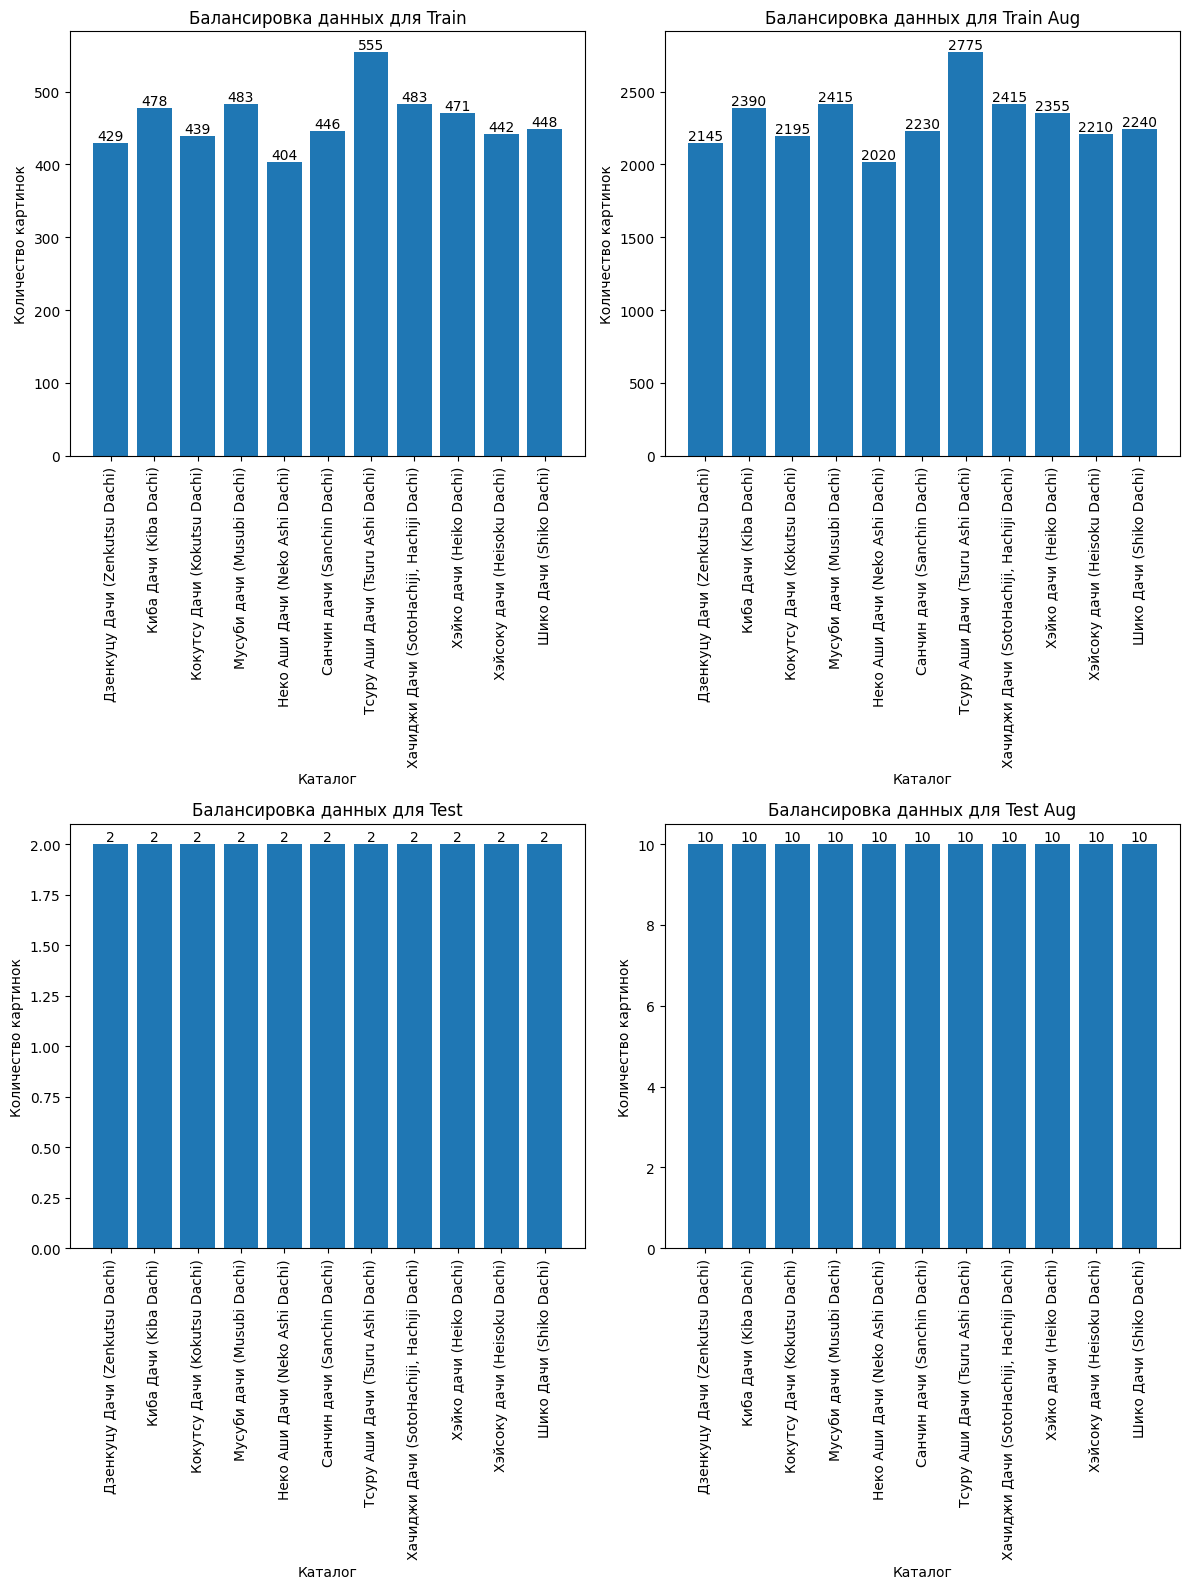

In [ ]:
#@title Вывод графиков балансировки данных

data_paths = [
    '/content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224',
    '/content/Karate mixed 11 classes 562 Images _ crop X-X/Karate train_224x224 aug',
    '/content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224',
    '/content/Karate mixed 11 classes 562 Images _ crop X-X/Karate test_224x224 aug'
]

# Создаем список меток для каждой папки
labels_all = ['Train', 'Train Aug', 'Test', 'Test Aug']

plt.figure(figsize=(12, 16))  # Устанавливаем размер графика

for i, data_path in enumerate(data_paths):
    plt.subplot(2, 2, i + 1)  # Создаем сетку 2x2 и выбираем текущий подграфик
    directories = os.listdir(data_path)
    directories.sort()

    labels = [os.path.basename(directory) for directory in directories]
    counts = []

    for directory in directories:
        files = os.listdir(os.path.join(data_path, directory))
        counts.append(len(files))

    plt.bar(labels, counts)
    plt.xticks(rotation=90)
    plt.xlabel('Каталог')
    plt.ylabel('Количество картинок')
    plt.title(f'Балансировка данных для {labels_all[i]}')

    # Добавляем надписи над столбцами
    for j in range(len(labels)):
        plt.text(j, counts[j], str(counts[j]), ha='center', va='bottom')

plt.tight_layout()  # Улучшает расположение графиков внутри сетки
plt.show()